# Brownian Motion

**A bit of background**:

Brownian motion describes the random motion of particles. This motion is named after the botanist Robert Brown, who first described the phenomenon in 1827, while looking through a microscope at pollen of the plant in water.

In mathematical finance, Brownian motion is described by the Wiener process, a continuous-time stochastic process. The Wiener process can be constructed as the scaling limit of a random walk. In mathematics, a random walk is an object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. A random variable that can jump up or down every second is an example of a random walk. If you plot it on the graph and them decrease the time interval ie it will jump every millisecond, you will approxiate a Brownian motion in continuous time.

Like the random walk, the Wiener process is recurrent in one or two dimensions (meaning that it returns almost surely to any fixed neighborhood infinitely often). Unlike the random walk, it is scale invariant which means that if you scale a Wiener Process it remains a Wiener Process.

**Applications in Finance**:

If there is a “secret formula” in the Monte Carlo simulation technique, it is the development of simulated stock prices. How is it done? The “Monte Carlo” aspect of this overall process simply refers to what is, in essence, “rolling of the dice” thousands of times. Monte Carlo techniques can be applied to myriad scenarios involving forecasting or predictive modeling. For awards with market conditions, simulated future stock prices are defined using a specific formula, described below, with one of the inputs varying based on each “roll of the dice,” i.e., the Monte Carlo simulation technique.

The formula used to estimate future stock prices was developed based on an observed process called Brownian Motion. This process is named after Robert Brown, a 19th century botanist who observed the seemingly random movements of pollen particles in a fluid under a microscope. Over the following decades and into the 20th century, mathematicians and scientists developed ways of formulaically describing random movements of particles, atoms, and eventually in financial theory to describe the movements of stock prices. Today, the generally accepted method for simulating stock price paths is using a formula often referred to as Geometric Brownian Motion with a Drift. The “Geometric Brownian Motion” portion of this formula refers to the random movements of the observed stock prices (pollen particles). The “drift” refers to constant forward motion, i.e., the passage of time. It can be thought of as a “breeze,” as though pollen particles are moving through the air over time assuming a constant wind speed. In other words, there are random movements mixing with a constant force. Some particles fly high into the sky (e.g., high TSR), some fall to the ground (e.g., low TSR), and some end up somewhere in between. We will refer to Geometric Brownian Motion with a Drift as GBM going forward.

**Can be applied as a "Framework" in a Monte Carlo simulation for stocks:**
https://www.investopedia.com/articles/07/montecarlo.asp

**Simulating Brownian Motion**

A Brownian motion $(W_t)_{t\geq 0}$ is a stochastic process which has the following properties:

- $W_0 = 0$ almost surely;
- for any $0\leq s \leq t$, $W_t - W_s$ is a Gausssian(Normal) random variable with mean zero and variance $t-s$;
- non-overlapping increments are independent.
Therefore, on the interval $[0,T]$, create a partition $0=t_0< \cdots < t_i < t_{i+1}<\cdots<t_n=T$, so that
$$
W_T = W_{t_n} = \left(W_{t_n} - W_{t_{n-1}}\right) + \cdots + \left(W_{t_1} - W_{t_{0}}\right).
$$
Using Property (ii) above, this is equal in distribution to
$$
W_T = W_{t_n} = \sqrt{t_n-t_{n-1}}\ \widetilde{N}_{n-1} + \cdots +\sqrt{t_{1}-t_{0}}\ \widetilde{N}_{0},
$$
where the sequence $(\widetilde{N}_{i})_{i}$ is iid centered Gaussian with unit variance.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

In [45]:
T, n, nbPaths = 1., 1000, 10
tt = np.linspace(0., T, n) # Equidistant discretisation grid from 0. to 1., discretized into 1000 segments
dt = tt[1] - tt[0] # delta

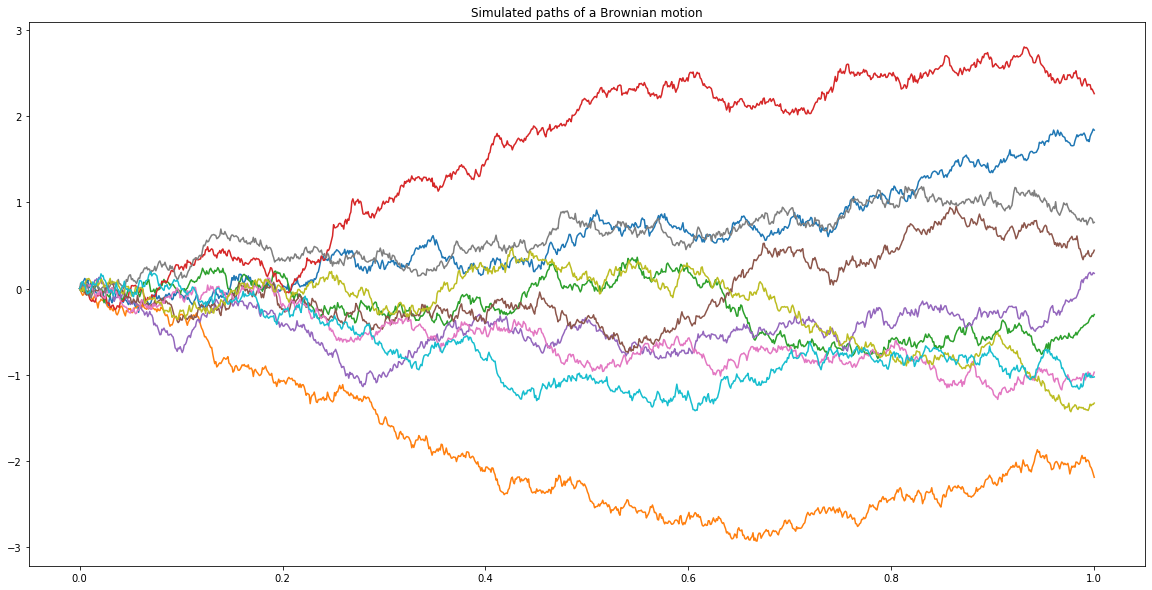

In [46]:
ww = np.zeros((n, nbPaths)) ## The Brownian motion starts at zero
N = np.random.normal(0.,1., (nbPaths, n-1))
for path in range(nbPaths):
    for (i,t) in enumerate(tt[:-1]):
        ww[i+1,path] = ww[i,path] + np.sqrt(dt) * np.random.normal(0.,1.)

plt.figure(figsize=(20,10))
for path in range(nbPaths):
    plt.plot(tt, ww[:, path])
plt.title("Simulated paths of a Brownian motion")
plt.show()

# Geometric Browninan Motion

Since BM can take on negative values, using it directly for modeling stock prices is
questionable. Instead, we can use a non-negative variation of BM called geometric Brownian motion.

Geometric Brownian Motion assumes that stock price follows lognormal distribution and  \begin{equation} S_t=e^{(\mu- \frac{1}{2}\sigma^2)t+ \sigma W(t)} \end{equation}



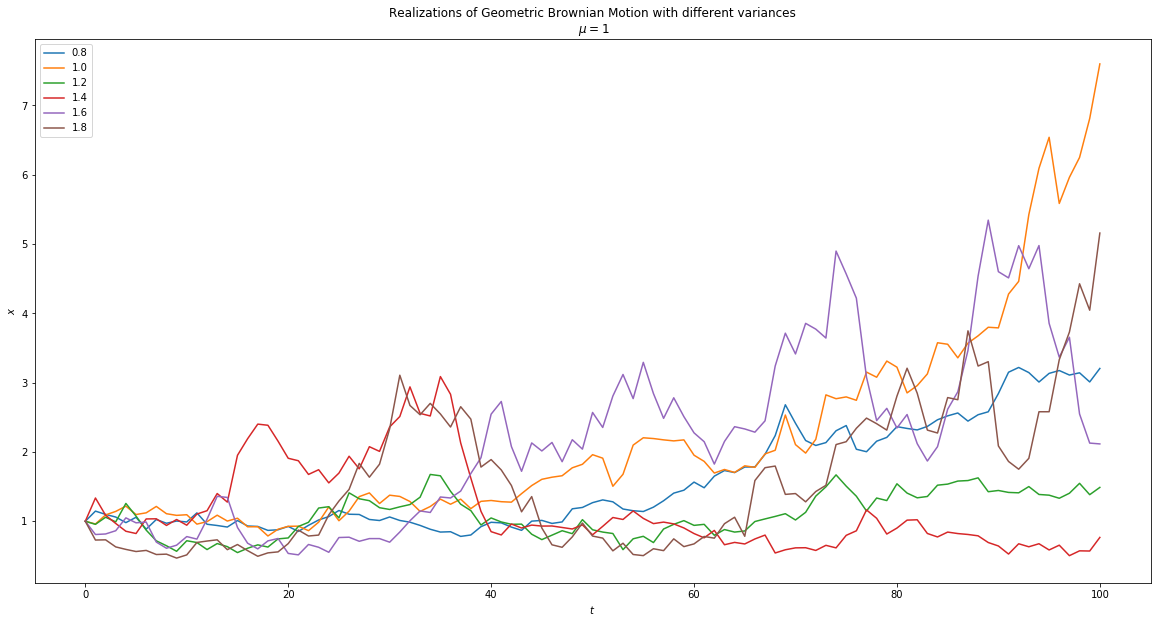

In [42]:
mu = 1
n = 100
dt = 0.01
x0 = 1
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.figure(figsize=(20,10))
plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()

Geometric Brownian motion is used to model stock prices in the Black–Scholes model and is the most widely used model of stock price behavior.

Some of the arguments for using GBM to model stock prices are:

The expected returns of GBM are independent of the value of the process (stock price), which agrees with what we would expect in reality.

- A GBM process only assumes positive values, just like real stock prices.
- A GBM process shows the same kind of 'roughness' in its paths as we see in real stock prices.
- Calculations with GBM processes are relatively easy.

However, GBM is not a completely realistic model, in particular it falls short of reality in the following points:

- In real stock prices, volatility changes over time (possibly stochastically), but in GBM, volatility is assumed constant.
- In real life, stock prices often show jumps caused by unpredictable events or news, but in GBM, the path is continuous (no discontinuity).


In an attempt to make GBM more realistic as a model for stock prices, one can drop the assumption that the volatility is constant. If we assume that the volatility is a deterministic function of the stock price and time, this is called a local volatility model. If instead we assume that the volatility has a randomness of its own—often described by a different equation driven by a different Brownian Motion—the model is called a stochastic volatility model.

## Pricing Options in the Black-Scholes model

### Option Pricing

A European Call option on some stock $(S_t)_{t\geq 0}$ gives the holder the right (but not the obligation) to exchange the stock at a future time $T$ for a given price $K$.
The initial value of such an option is therefore (by no-arbitrage arguments):
\begin{equation*}
C(S_0, K, T) = \mathbb{E}\left[\max(S_T-K, 0)\right] = 
(S_{T}-K)\mathbb{1}_{S_T\geq K} + 0\mathbb{1}_{S_T< K}.
\end{equation*}
*Note: We consider no interest rate nor dividends here*.

### A quick introduction to Black-Scholes

The Black–Scholes model is one of the cornerstones of mathematical finance.
It assumes that the underlying stock price has the following dynamics:
$$
S_t
 = S_0\exp\left\{-\frac{\sigma^2 t}{2} + \sigma W_t\right\}
 = S_0\exp\left\{-\frac{\sigma^2 t}{2} + \sigma\widetilde{n}\sqrt{t}\right\} \text{ (in distribution)},
$$
for each $t\geq 0$, for some constant $\sigma>0$, and where $\widetilde{n}$ is a standard Gaussian random variable.
Here $(W_t)_{t\geq 0}$ is a standard Brownian motion, and satisfies:
- $W_0 = 0$ almost surely;
- for any $0\leq s \leq t$, $W_t - W_s$ is a Gausssian random variable with mean zero and variance $t-s$;
- non-overlapping increments are independent.

The value of a European Call option on $(S_t)_{t\geq 0}$ in the Black-Scholes model is given, at time $t\in [0,T]$, by
$$
C^{\mathrm{BS}}(S_t, t, K, T:\sigma) := \mathbb{E}\left[\max(S_{T} - K, 0)\right]
 = S_t\left(\mathcal{N}(d_{+}) - \mathrm{e}^{k}\mathcal{N}(d_{-})\right),
$$
where
$$
d_{\pm} = \frac{-k}{\sigma\sqrt{T - t}} \pm\frac{\sigma\sqrt{T-t}}{2}
$$
and
- $k := \log\left(K / S_t\right)$ is called the log moneyness;
- $\mathcal{N}(\cdot)$ is the cumulative distribution function of the standard normal distribution,
- $T - t$ is the time to maturity;
- $S_t$ is the spot price of the underlying asset;
- $K$ is the strike price;
- $\sigma$ is the volatility  of returns of the underlying asset.


### Pricing via the closed-form formula

In [31]:
from scipy.stats import norm

def BSCall(S0, K, sigma, t, T):
    '''
    #Inputs:
    S0: initial stock price
    K: strike
    sigma: instantaneous volatility
    T: time to maturity
    #Output:
    Black-Scholes Call price
    '''
    tau = T - t
    sigmtau = sigma*np.sqrt(tau)
    k = np.log(K/S0)
    dp = -k / sigmtau + 0.5*sigmtau
    dm = dp - sigmtau
    return S0*(norm.cdf(dp) - np.exp(k)*norm.cdf(dm))

In [32]:
S0, K, sigma, t, T = 100., 100., 0.2, 0., 1.
print("Black-Scholes Call option price:", BSCall(S0,K,sigma,t,T))

Black-Scholes Call option price: 7.965567455405798


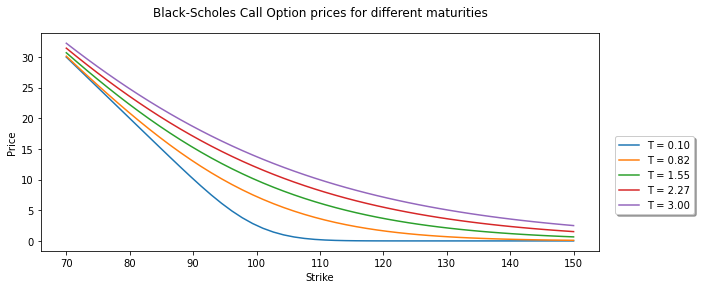

In [33]:
TT = np.linspace(0.1,3.,5)
strikes = np.linspace(70., 150, 50)
plt.figure(figsize=(10, 4))

for T in TT:
    plt.plot(strikes, [BSCall(S0,K,sigma,t,T) for K in strikes], label='T = %.2f' %T)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.55),fancybox=True, shadow=True, ncol=1)
plt.title('Black-Scholes Call Option prices for different maturities',y=1.05,fontsize=12)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.show()